### 01. Importando csv e fazendo analise inicial.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df_churn = pd.read_csv('churn.csv', index_col='RowNumber')
df_churn.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


In [120]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.3+ MB


In [3]:
df_churn.Geography.value_counts() # Verificando quais são os países da mostra e quantos dados tem de cada um.

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [4]:
df_churn_porcentagem = (df_churn.Geography.value_counts() / df_churn.Geography.value_counts().sum()) * 100
df_churn_porcentagem.head()

France     50.14
Germany    25.09
Spain      24.77
Name: Geography, dtype: float64

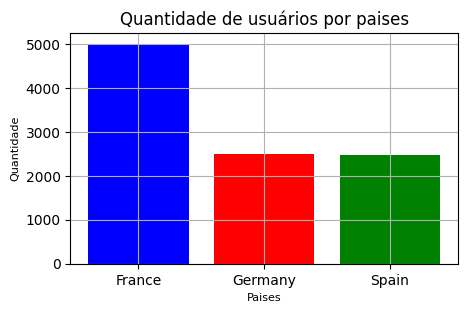

In [5]:
labels = ['France', 'Germany', 'Spain']
vals = df_churn.Geography.value_counts()
fig, ax = plt.subplots(figsize=(5, 3))
ax.bar(labels, vals, color=['blue', 'red', 'green'])
ax.set_title('Quantidade de usuários por paises', fontsize=12)

ax.set_ylabel('Quantidade', fontsize=8)
ax.set_xlabel('Paises', fontsize=8)
ax.grid()
plt.show()


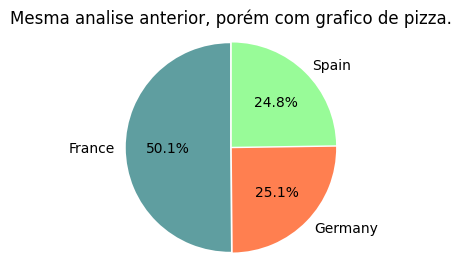

In [6]:
labes = ['France', 'Germany', 'Spain']
sizes = [50.14, 25.09, 24.77]

explode = [0.01, 0.01, 0.01]

fig, ax1 = plt.subplots(figsize=(5, 3))

cores = ['#5F9EA0', '#FF7F50', '#98FB98']

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90, colors=cores)

ax1.set_title('Mesma analise anterior, porém com grafico de pizza.')

ax1.axis('equal')

plt.show()

#### O DF tem 3 paises, França, Alemanha e Espanha, sendo a França com a maior quantidade de clientes, representando 50.14 % do total de 10 mil clientes.

In [7]:
arr_delete = ['CustomerId', 'Surname'] # Criando arrei de colunas que não são interessantes para a analise.

df_churn.drop(arr_delete, axis=1, inplace = True) # Usando o drop() para deletar colunas que foram selecionadas no arrei.
df_churn.head(10) # Novo data frame sem as colunas.

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
9,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


In [8]:
df_churn.info() # Verificando o tipo das informações do data frame.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB


In [9]:
df_churn_exited = df_churn.loc[df_churn['Exited']==1] # separando clientes que sairam.
df_churn_exited

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
6,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
8,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
17,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...
9982,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9983,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9992,597,France,Female,53,4,88381.21,1,1,0,69384.71,1


In [10]:
df_churn_sairam_porc = (df_churn.Exited.value_counts() / df_churn.Exited.value_counts().sum()) * 100 # verificando porcentagem dos clientes que sairam.
df_churn_sairam_porc

0    79.63
1    20.37
Name: Exited, dtype: float64

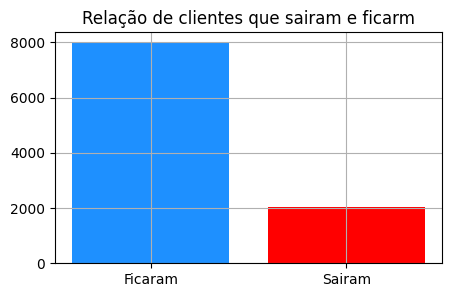

In [11]:
labels = ['Ficaram', 'Sairam']
vals = df_churn.Exited.value_counts()
fig, ax = plt.subplots(figsize=(5, 3))
ax.bar(labels, vals, color=['DodgerBlue', 'red'])
ax.grid()
ax.set_title('Relação de clientes que sairam e ficarm', fontsize=12)

plt.show()


### Os clientes que sairam represetam 20.37%, sendo 2037.

In [13]:
df_churn_mulher = df_churn_exited.loc[(df_churn_exited['Gender']=='Female') & (df_churn_exited['Exited']==1) ] # Separando por genero dentro dos clientes que sairam.
df_churn_mulher

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
8,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
23,510,Spain,Female,38,4,0.00,1,1,0,118913.53,1
31,591,Spain,Female,39,3,0.00,3,1,0,140469.38,1
...,...,...,...,...,...,...,...,...,...,...,...
9957,520,France,Female,46,10,85216.61,1,1,0,117369.52,1
9961,795,Germany,Female,33,9,104552.72,1,1,1,120853.83,1
9983,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1


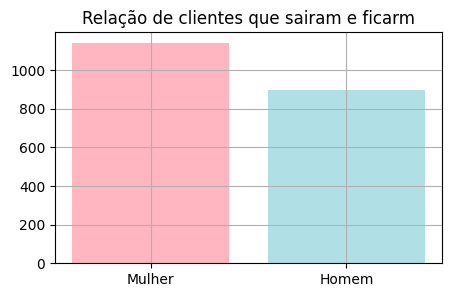

In [14]:
labels = ['Mulher', 'Homem']
vals = df_churn_exited.Gender.value_counts()
fig, ax = plt.subplots(figsize=(5, 3))
ax.bar(labels, vals, color=['#FFB6C1', '#B0E0E6'])
ax.grid()
ax.set_title('Relação de clientes que sairam e ficarm', fontsize=12)

plt.show()


In [15]:
print(df_churn_exited['Age'].max())
print(df_churn_exited['Age'].min())

84
18


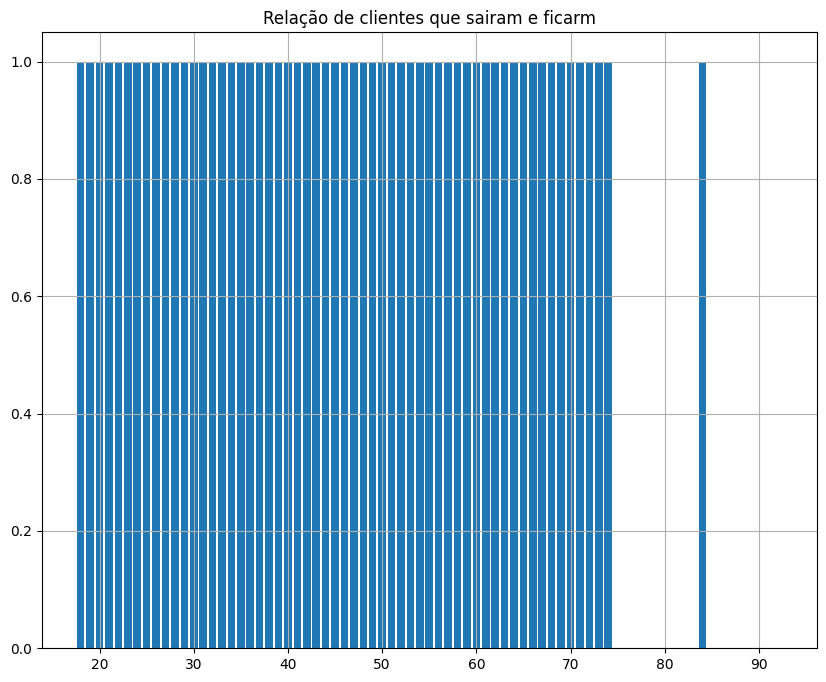

In [23]:
labels = df_churn['Age']
vals = df_churn['Exited']
fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(labels, vals)
ax.grid()
ax.set_title('Relação de clientes que sairam e ficarm', fontsize=12)

plt.show()

In [28]:
df_churn_produtos = df_churn_exited.loc[df_churn.NumOfProducts>=3] # Verificando a quantidade de clientes que possuem 3 ou mais produtos e mesmo assim sairam.
df_churn_produtos

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
8,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
31,591,Spain,Female,39,3,0.00,3,1,0,140469.38,1
71,738,Germany,Male,58,2,133745.44,4,1,0,28373.86,1
89,646,France,Female,46,4,0.00,3,1,0,93251.42,1
...,...,...,...,...,...,...,...,...,...,...,...
9717,812,Germany,Male,39,5,115730.71,3,1,1,185599.34,1
9748,610,Germany,Female,69,5,86038.21,3,0,0,192743.06,1
9801,762,Spain,Female,35,3,119349.69,3,1,1,47114.18,1


In [33]:
df_churn_qtd_produtos = df_churn_exited.NumOfProducts.value_counts()
df_churn_qtd_produtos

1    1409
2     348
3     220
4      60
Name: NumOfProducts, dtype: int64

In [55]:
df_churn_qunt_paises = df_churn_exited.Geography.value_counts()
df_churn_qunt_paises

Germany    814
France     810
Spain      413
Name: Geography, dtype: int64

In [54]:
df_churn_qunt_paises = df_churn_exited.Geography.value_counts() / df_churn_exited.Geography.value_counts().sum() * 100
df_churn_qunt_paises

Germany    39.960727
France     39.764359
Spain      20.274914
Name: Geography, dtype: float64

In [56]:
df_churn_credito = df_churn_exited.loc[df_churn_exited.CreditScore < 501]
df_churn_credito

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
8,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
36,475,France,Female,45,0,134264.04,1,1,0,27822.99,1
42,465,France,Female,51,8,122522.32,1,0,0,181297.65,1
110,479,Germany,Male,35,9,92833.89,1,1,0,99449.86,1
126,432,France,Male,42,9,152603.45,1,1,0,110265.24,1
...,...,...,...,...,...,...,...,...,...,...,...
9625,350,France,Female,40,0,111098.85,1,1,1,172321.21,1
9653,480,France,Female,40,7,0.00,1,1,0,170332.67,1
9826,467,Germany,Male,28,10,126315.26,1,1,0,32349.29,1


In [59]:
df_churn_credito = df_churn_exited.loc[df_churn_exited.CreditScore >= 500]
df_churn_credito

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
6,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
17,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
23,510,Spain,Female,38,4,0.00,1,1,0,118913.53,1
...,...,...,...,...,...,...,...,...,...,...,...
9976,610,Germany,Male,50,1,113957.01,2,1,0,196526.55,1
9983,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9992,597,France,Female,53,4,88381.21,1,1,0,69384.71,1


In [60]:
df_membro_ativo = df_churn_exited.loc[df_churn_exited.IsActiveMember == 1]
df_membro_ativo

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
47,829,Germany,Female,27,9,112045.67,1,1,1,119708.21,1
48,637,Germany,Female,39,9,137843.80,1,1,1,117622.80,1
91,647,Spain,Female,44,5,0.00,3,1,1,174205.22,1
105,670,Spain,Female,65,1,0.00,1,1,1,177655.68,1
...,...,...,...,...,...,...,...,...,...,...,...
9935,692,Germany,Female,43,10,118588.83,1,1,1,161241.65,1
9948,615,France,Male,34,1,83503.11,2,1,1,73124.53,1
9961,795,Germany,Female,33,9,104552.72,1,1,1,120853.83,1


## -----Analise-----
### Das 2037 pessoas que sairam:
#### - 1139 são mulheres, representando a maioria;
#### - 810 são franceses, considerando a quantidade de clientes geral por país, a frança representa uma grande porcentagem dos que sairam;
#### - 735 eram membros ativos;
#### - 1887 tinham o score maior que 500;